# States

In [2]:
# import quantum_simulation_recipe as qsr
# from quantum_simulation_recipe import spin_ham
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, DensityMatrix
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_city
from qiskit.quantum_info import SparsePauliOp, commutator, anti_commutator, entropy, Statevector, random_statevector, random_density_matrix, partial_trace
import numpy as np
from numpy.linalg import norm  

## Pure states

### Product states

In [3]:
## create a statevector from label such as '11'
product_vec = Statevector.from_label('1'*2) # 0, 1, r, l
print('product_vec: ', product_vec)

product_vec:  Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))


In [4]:
## to_dict
psi = Statevector.from_label('-0')
print(psi.to_dict())

{'00': (0.7071067811865475+0j), '10': (-0.7071067811865475+0j)}


In [5]:
## state to projector operator
print(psi.to_operator())
print(np.outer(psi.data, psi.data.conj()))

Operator([[ 0.5+0.j,  0. +0.j, -0.5-0.j,  0. +0.j],
          [ 0. +0.j,  0. +0.j,  0. -0.j,  0. +0.j],
          [-0.5+0.j,  0. +0.j,  0.5+0.j,  0. +0.j],
          [ 0. +0.j,  0. +0.j,  0. -0.j,  0. +0.j]],
         input_dims=(2, 2), output_dims=(2, 2))
[[ 0.5+0.j  0. +0.j -0.5-0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. -0.j  0. +0.j]
 [-0.5+0.j  0. +0.j  0.5+0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. -0.j  0. +0.j]]


### Overlap

In [3]:
n = 2
psi0 = random_statevector([2, 2])
psi1 = Statevector.from_label('0'*n)
print('psi0: ', psi0)
psi0.inner(psi1)

psi0:  Statevector([ 0.1383967 +0.2600865j , -0.20928601-0.00830353j,
              0.11559883-0.30354354j,  0.61472335-0.6212449j ],
            dims=(2, 2))


(0.13839669998761342-0.26008649665534855j)

### Visualization

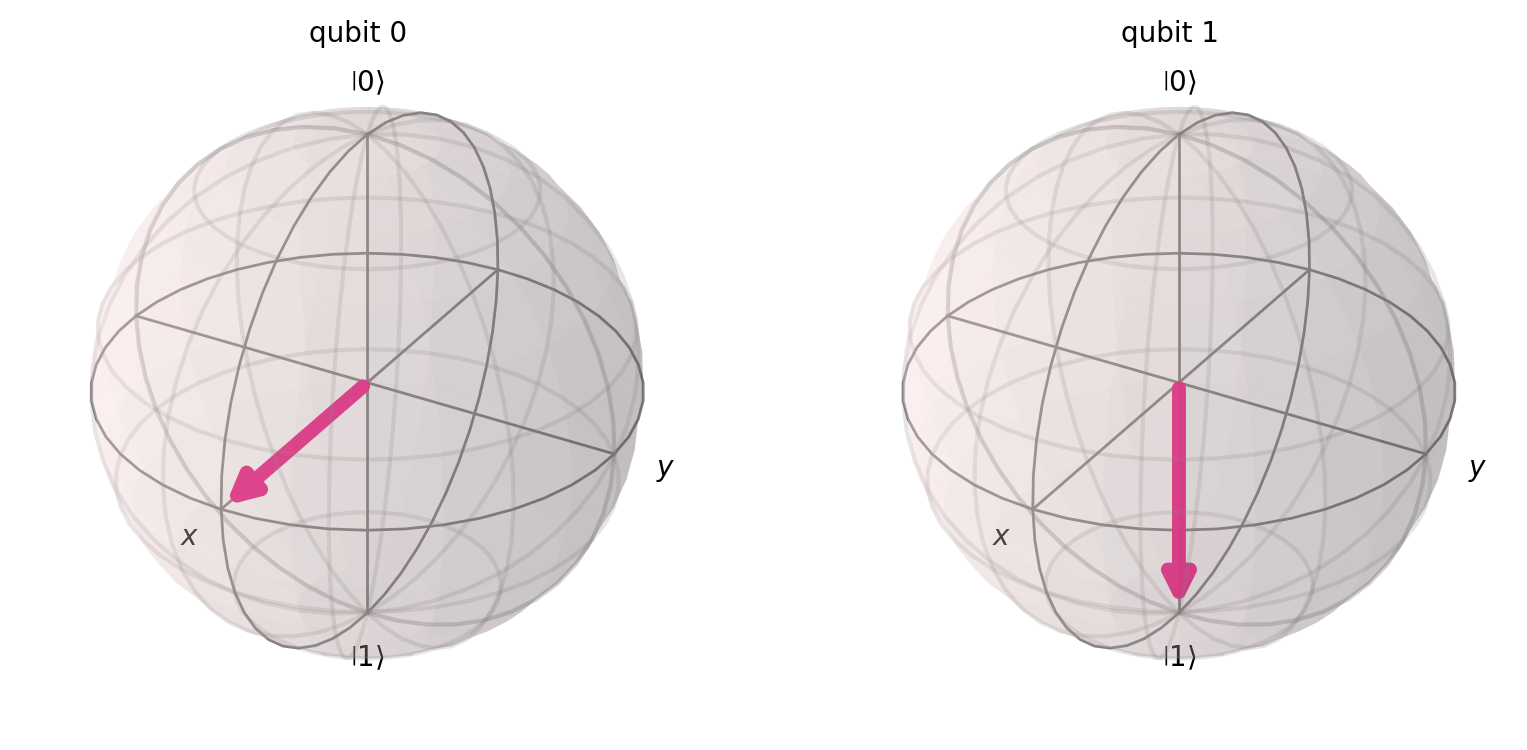

In [6]:
# https://docs.quantum.ibm.com/api/qiskit/qiskit.visualization.plot_bloch_multivector
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector 

qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
 
state = Statevector(qc)
plot_bloch_multivector(state)

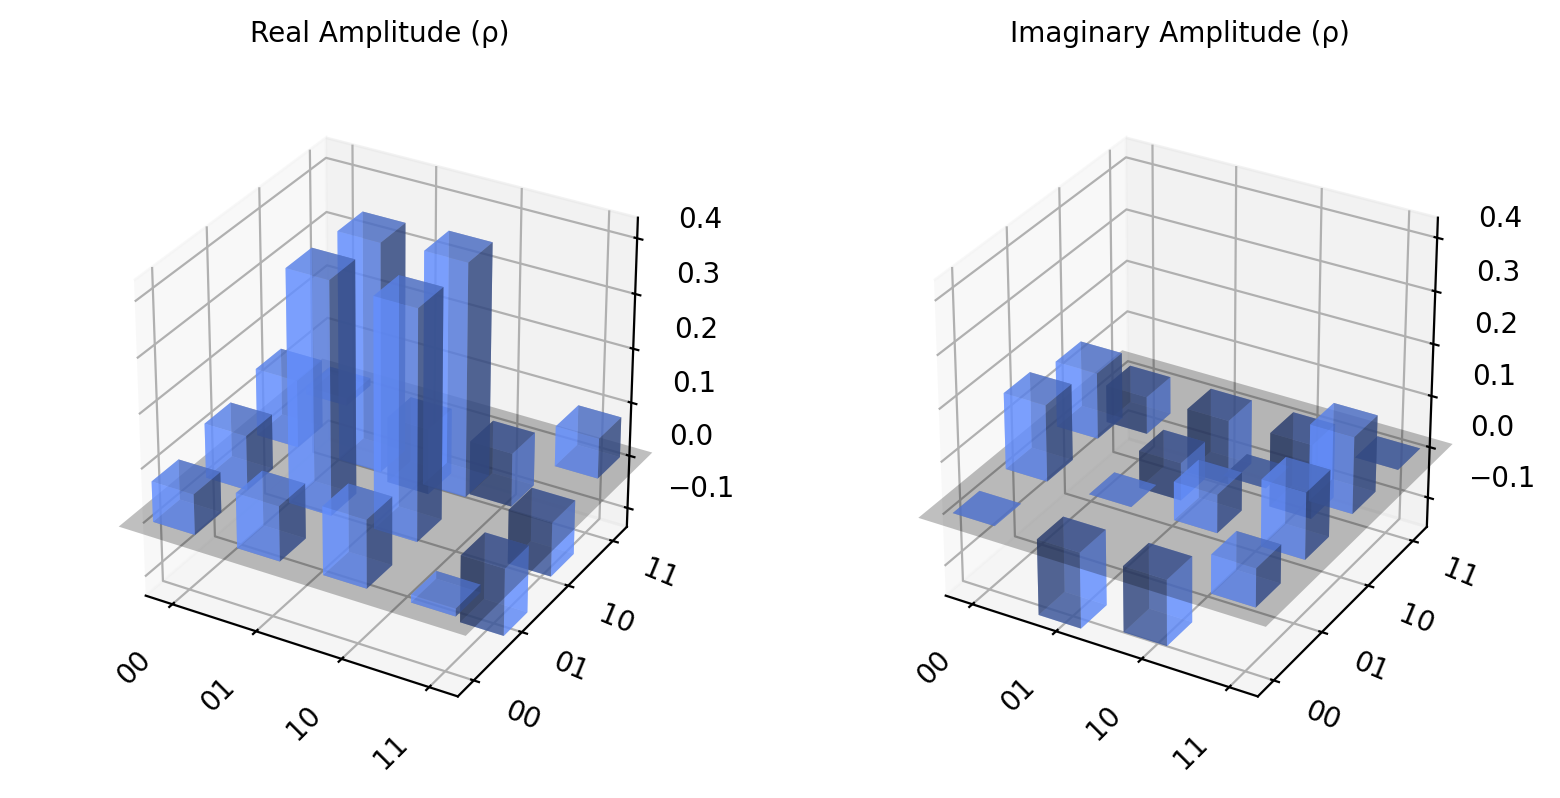

In [9]:
# You can make the bars more transparent to better see the ones that are behind
# if they overlap.
 
import numpy as np
from qiskit.visualization import plot_state_city
from qiskit import QuantumCircuit
 
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
  
qc = QuantumCircuit(2)
qc.h([0, 1])
qc.cz(0,1)
qc.ry(np.pi/3, 0)
qc.rx(np.pi/5, 1)
 
state = Statevector(qc)
plot_state_city(state, alpha=0.6, figsize=(8, 4))

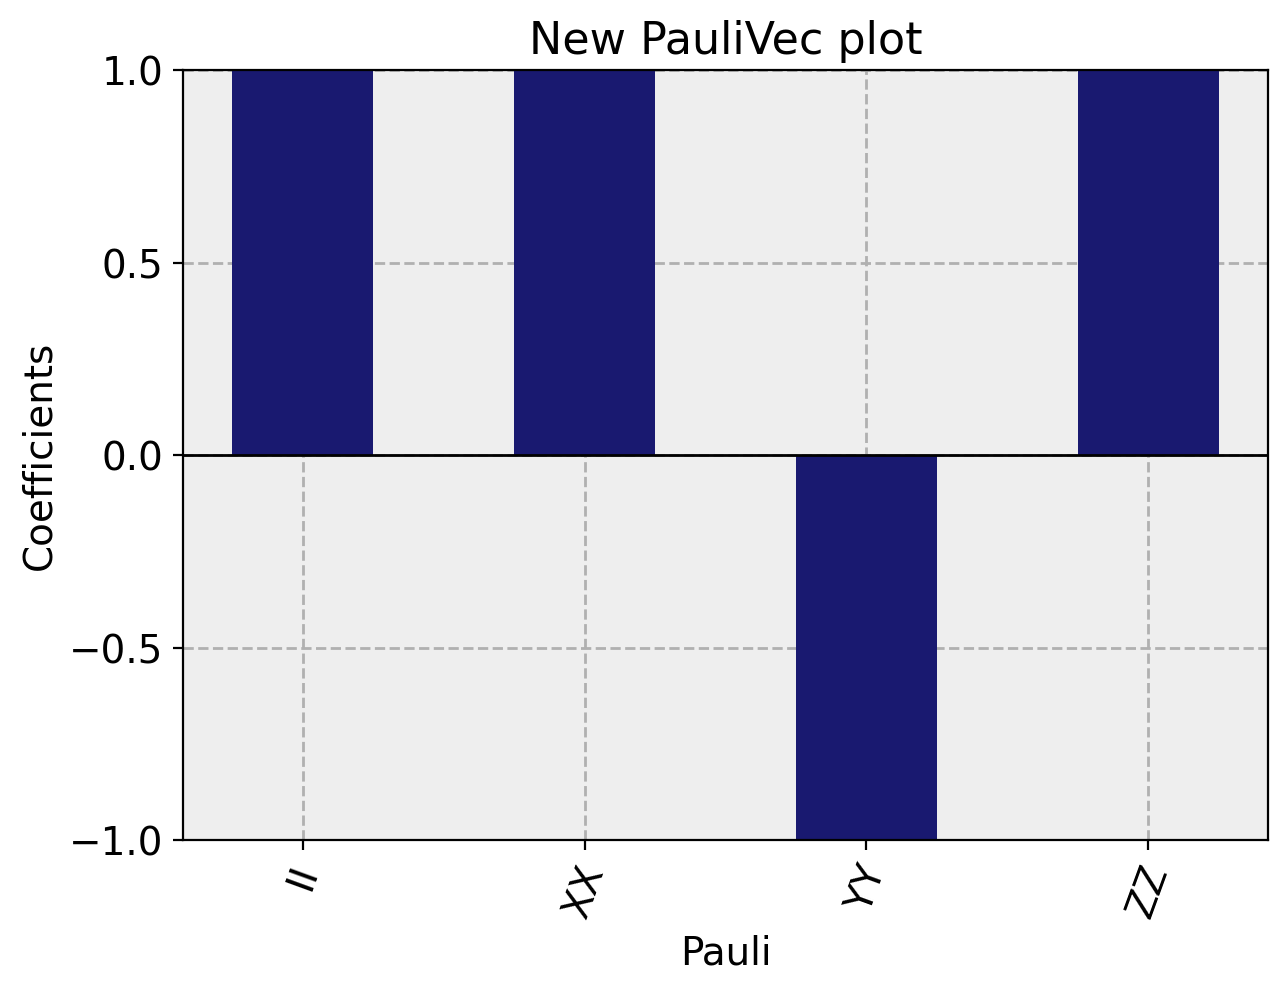

In [10]:
# https://docs.quantum.ibm.com/api/qiskit/qiskit.visualization.plot_state_paulivec
# You can set a color for all the bars.
 
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_paulivec
 
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
 
state = Statevector(qc)
plot_state_paulivec(state, color='midnightblue', title="New PauliVec plot")

### Random states

In [11]:
## Haar random pure state
from qiskit.quantum_info import random_statevector

random_state = random_statevector(2**2)
print(random_state)
print(random_state.data)

Statevector([-0.37338293-0.05732617j, -0.31570027+0.20323476j,
             -0.04746843-0.04889054j, -0.39519009+0.74532485j],
            dims=(2, 2))
[-0.37338293-0.05732617j -0.31570027+0.20323476j -0.04746843-0.04889054j
 -0.39519009+0.74532485j]


In [163]:
#### 1-design

## Evolution

## Measure

[ 0.2692275 -0.20166337j  0.34713242+0.35930287j  0.06224331-0.27153787j
 -0.04900098+0.16502855j  0.45275193-0.18436086j  0.24568119-0.41552992j
 -0.04925681-0.03146001j -0.19897181+0.12248696j]
{'000': 9, '001': 20, '010': 13, '011': 3, '100': 25, '101': 21, '111': 9}


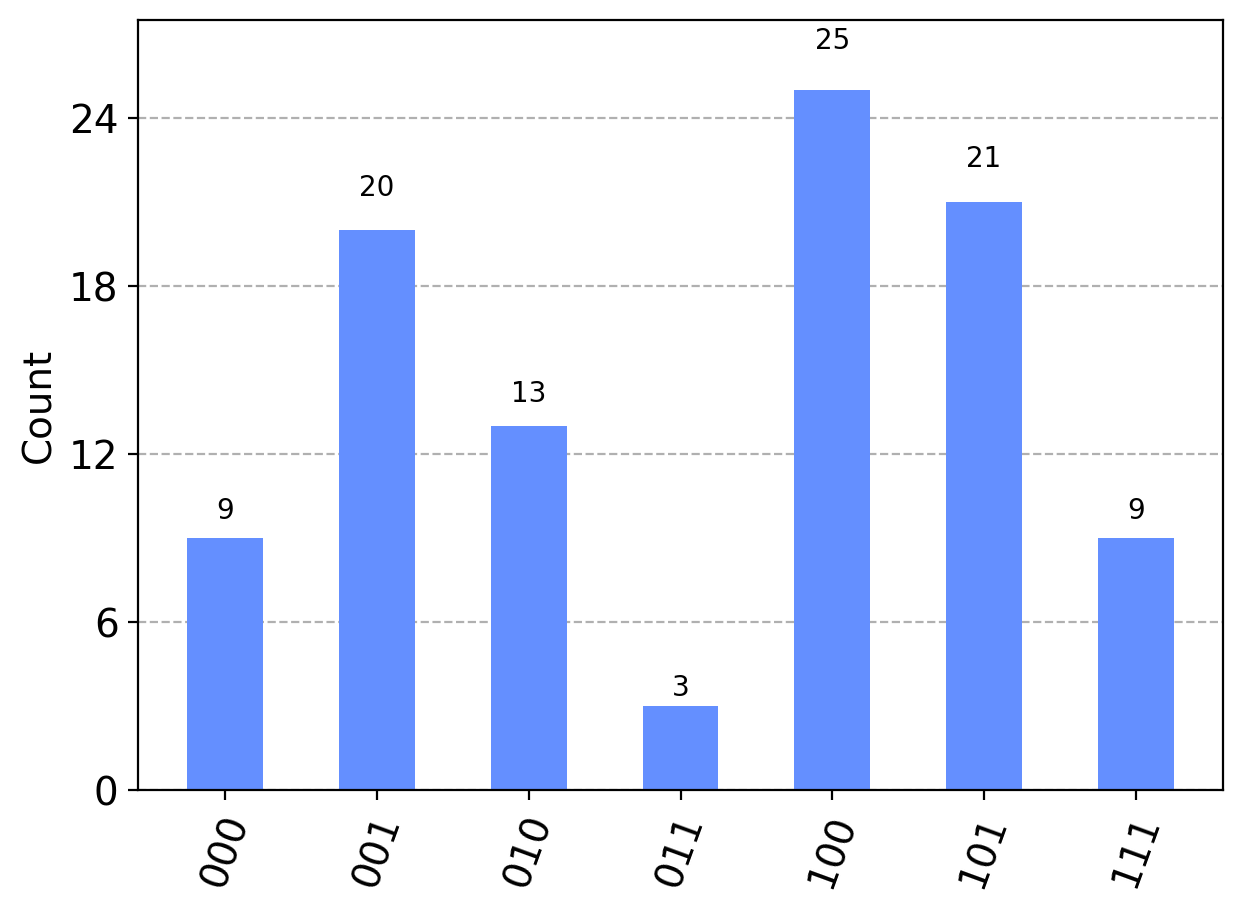

In [12]:
n = 3
random_state = random_statevector([2]*n)
print(random_state.data)
sample_count = random_state.sample_counts(100)
print(sample_count)
# plot histogram of sample count
from qiskit.visualization import plot_histogram
plot_histogram(sample_count)

## Mixed state 

In [153]:
## random densitry matrix
from qiskit.quantum_info import random_density_matrix

random_density_matrix(4)

DensityMatrix([[ 0.54496788-1.03339759e-18j,  0.12792975+1.48022386e-01j,
                -0.09790559-7.79656825e-03j, -0.23076562+3.38692632e-02j],
               [ 0.12792975-1.48022386e-01j,  0.21852742-4.61091820e-19j,
                -0.02891472+4.34432728e-03j, -0.06771913+5.96049968e-02j],
               [-0.09790559+7.79656825e-03j, -0.02891472-4.34432728e-03j,
                 0.07696603+2.00420617e-19j,  0.07215407-4.65205368e-02j],
               [-0.23076562-3.38692632e-02j, -0.06771913-5.96049968e-02j,
                 0.07215407+4.65205368e-02j,  0.15953868+1.29406880e-18j]],
              dims=(2, 2))


### convert a pure state to density matrix

In [154]:
init_state = Statevector.from_label('0'*2)
init_dm = DensityMatrix(init_state).to_operator()
init_dm 

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


## Entangled state

### Bell state

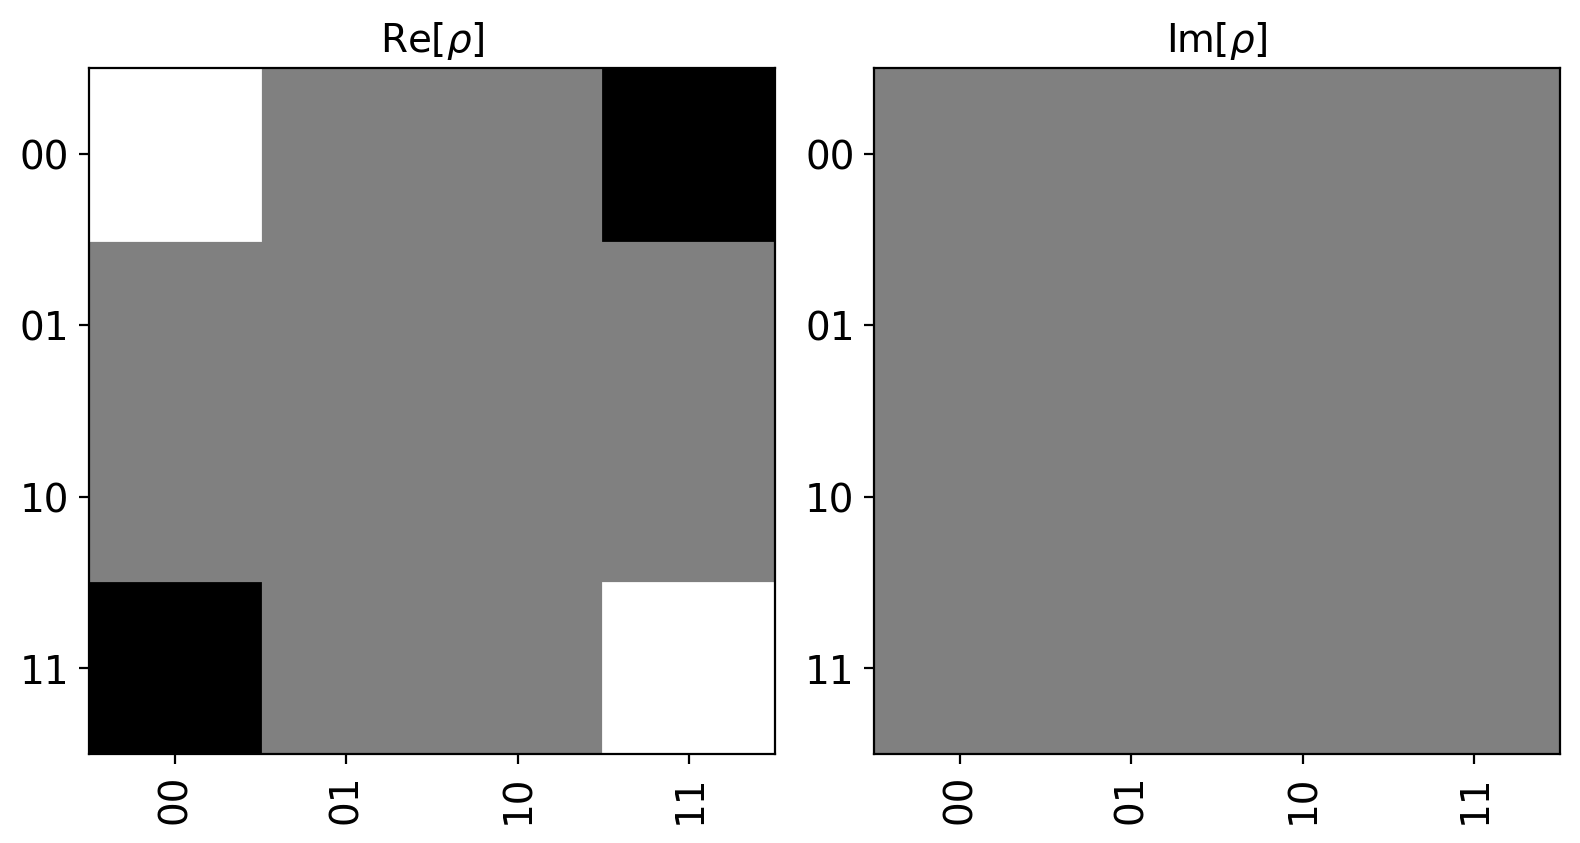

In [157]:

sv = Statevector([1/np.sqrt(2), 0, 0, -1/np.sqrt(2)])
sv.draw(output='hinton')

### GHZ, W states

In [18]:
# GHZ state
ghz_state = Statevector.from_label('0000') + Statevector.from_label('1111')
# verify
print(ghz_state.is_valid())
# normalize
normalized_ghz = ghz_state/np.linalg.norm(ghz_state)
normalized_ghz.is_valid()

False


True

## Stabilizer state
https://docs.quantum.ibm.com/api/qiskit/qiskit.quantum_info.StabilizerState#stabilizerstate

In [1]:
from qiskit.quantum_info import StabilizerState
 
stabilizer_list = ["ZXX", "-XYX", "+ZYY"]
stab = StabilizerState.from_stabilizer_list(stabilizer_list)
stab

StabilizerState(['+ZXX', '-XYX', '+ZYY'])

In [6]:
print(stab.clifford)
print('purity: ', stab.purity())

Clifford: Stabilizer = ['+ZXX', '-XYX', '+ZYY'], Destabilizer = ['+IXZ', '-XIZ', '-XXZ']
purity:  1.0


## Mixed state

### Pauli representation

Plot the Pauli-vector representation of a quantum state as bar graph.

The Pauli-vector of a density matrix ρ is defined by the expectation of each possible tensor product of single-qubit Pauli operators (including the identity), that is
....
This function plots the coefficients Tr(σρ) as bar graph.

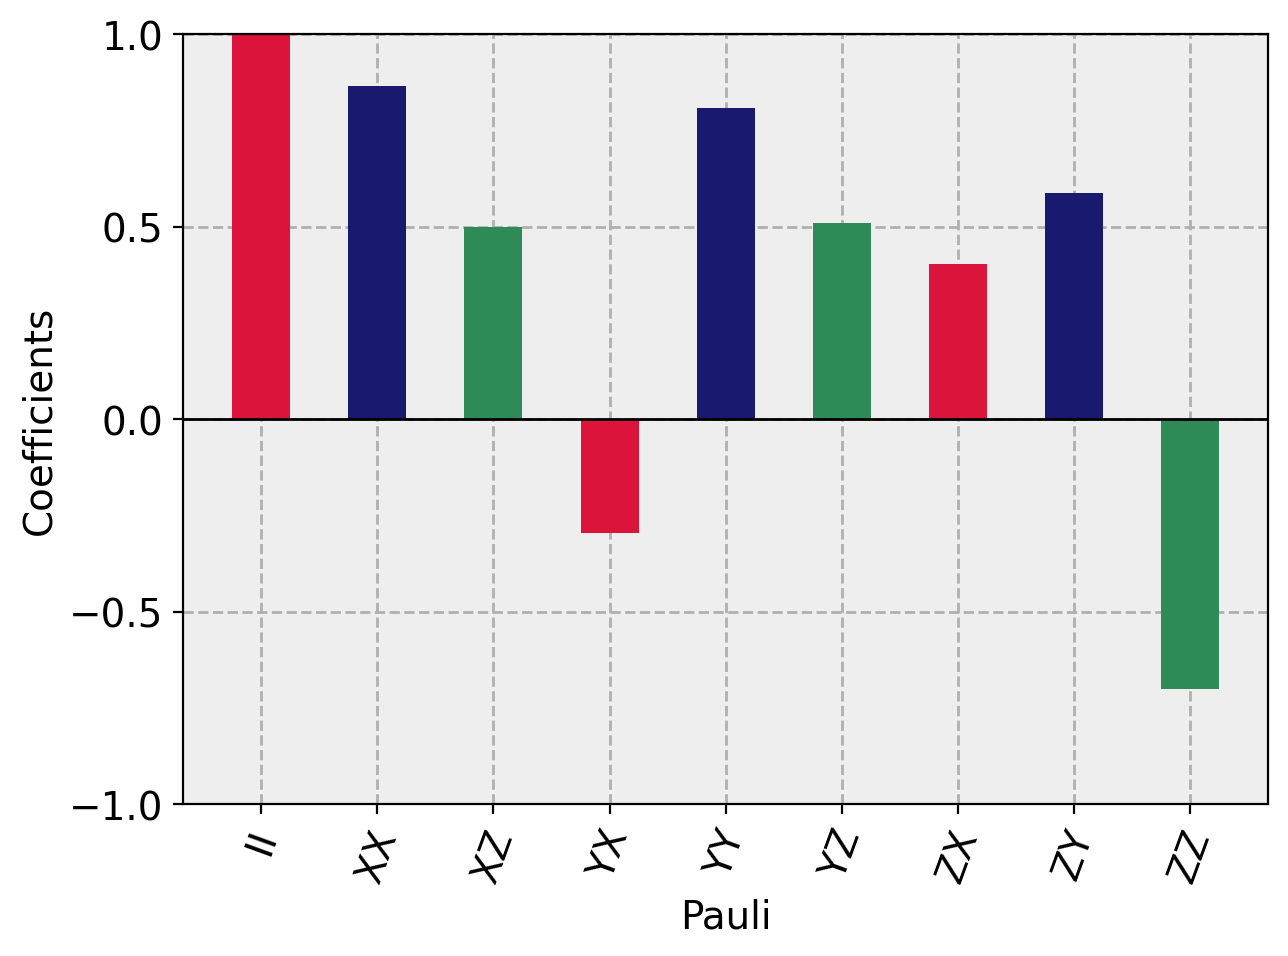

In [14]:
# If you introduce a list with less colors than bars, the color of the bars will
# alternate following the sequence from the list.
 
import numpy as np
from qiskit.quantum_info import DensityMatrix
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_paulivec
 
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
 
qc = QuantumCircuit(2)
qc.h([0, 1])
qc.cz(0, 1)
qc.ry(np.pi/3, 0)
qc.rx(np.pi/5, 1)
 
matrix = DensityMatrix(qc)
plot_state_paulivec(matrix, color=['crimson', 'midnightblue', 'seagreen'])

## Partial trace